In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import copy

from shapely import Point
from shapely import affinity, set_precision
from shapely.plotting import plot_points

sys.path.insert(1, '/Users/neoh/Documents/git/eeroqlab/')
#sys.path.insert(1, '/Users/helium/Documents/git/eeroqlab/')

%matplotlib inline
%config InlineBackend.figure_format='retina'


In [2]:
from zeroheliumkit.dev.core import GeometryCollection
from zeroheliumkit.dev.anchors import *
from zeroheliumkit.dev.geometries import *
from zeroheliumkit.dev.supercore import *

from zeroheliumkit.settings import *
from zeroheliumkit.helpers.plotting import *

colorlist = [BLUE, YELLOW2, RED, GREEN, GRAY]

0.0


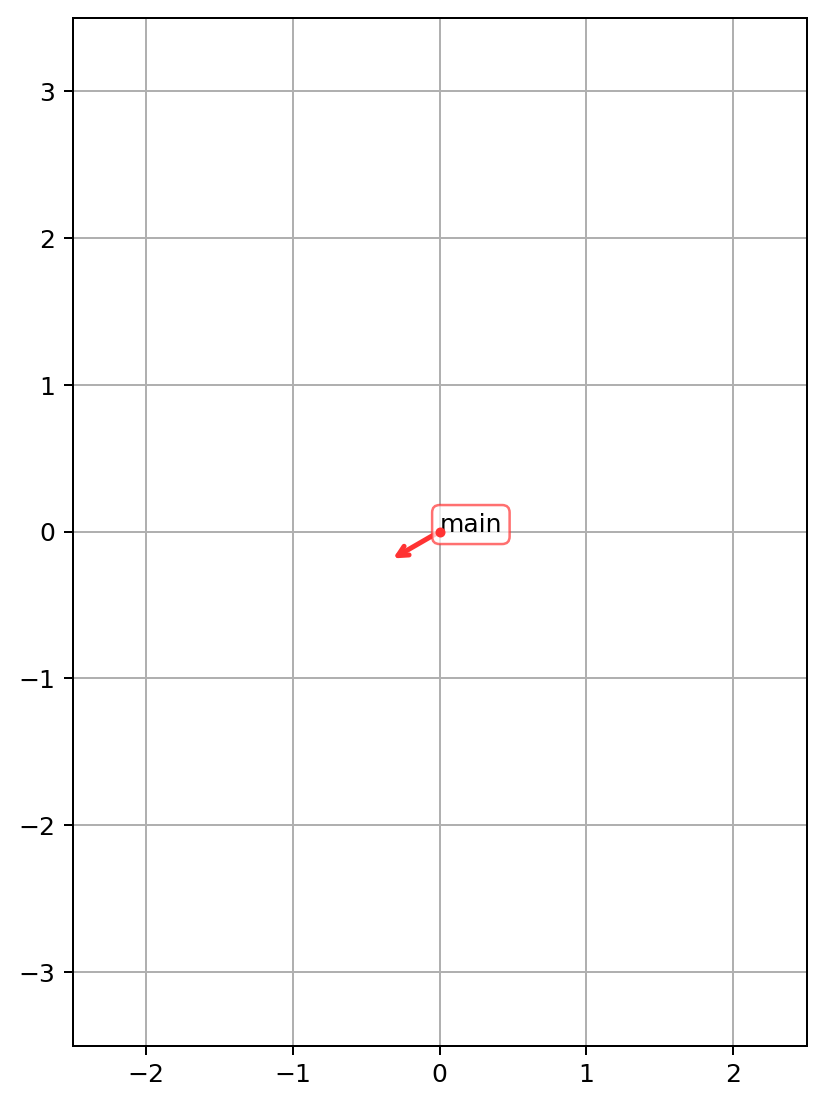

In [3]:
p = Anchor((0,0), 10, "main")
p.rotate(920)
print(p.x)

fig = plt.figure(1, figsize=SIZE_L, dpi=90)
ax = fig.add_subplot(111)
set_limits(ax=ax, coor=(0,0), dxdy=[5, 7])

p.plot(ax=ax, color=RED)

plt.grid()
plt.gca().set_aspect('equal')
plt.show()

In [4]:
config = {"top": True,
          "gnd": True}

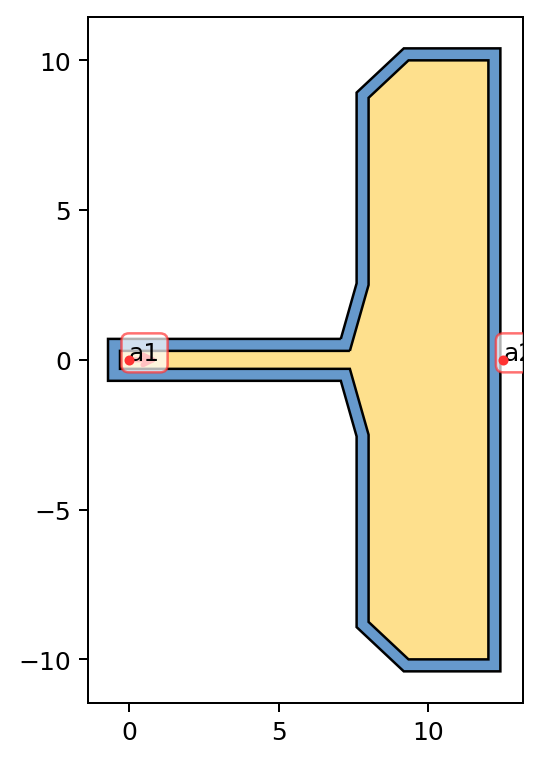

In [5]:
pg = PinchGate(arm_w = 0.6, 
               arm_l = 8, 
               length = 20, 
               width = 4)
pgate_base = GeometryCollection(layers={"top": pg,
                                        "gnd": pg.buffer(0.4, join_style="mitre"),
                                        "anchorsmod": MultiAnchor([Anchor((0,0), 0, "a1"), Anchor((8 + 4 + 0.5, 0), 0, "a2")])})


fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
pgate_base.plot(ax=ax, layer=["gnd", "top", "anchorsmod"], color=colorlist)
plt.gca().set_aspect('equal')
plt.show()

In [6]:
pgate_base.add_anchor([Anchor((5,5), 56, "b1"), Anchor((5,-5), -56, "b2")])
pgate_base.rotate(49)

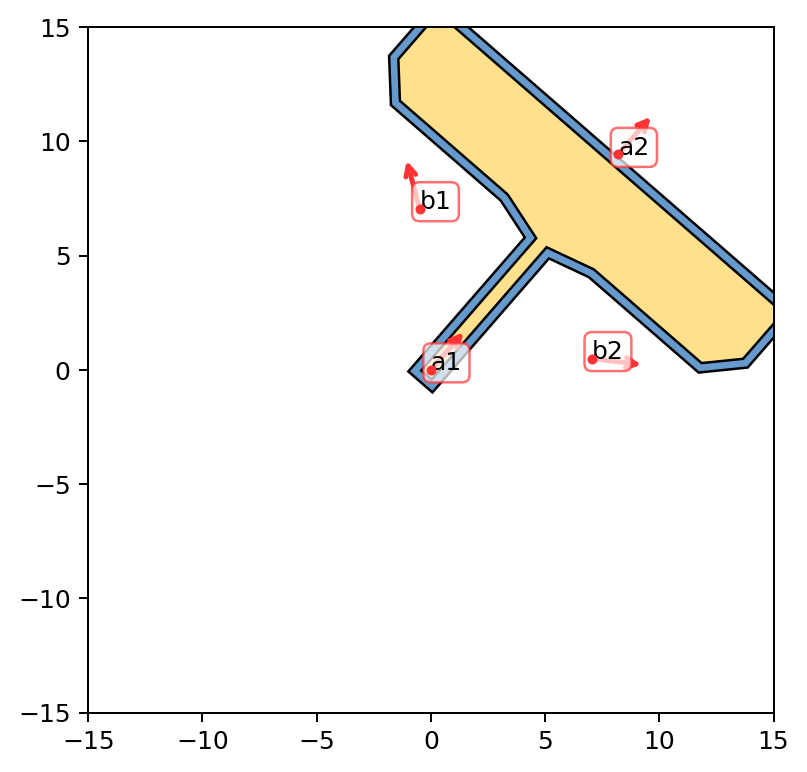

In [7]:
fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
set_limits(ax=ax, coor=[0,0], dxdy=[30,30])
pgate_base.plot(ax=ax, layer=["gnd", "top", "anchorsmod"], color=colorlist, draw_direction=True)
plt.gca().set_aspect('equal')
plt.show()

In [8]:
pgate_base.get_anchor("a1").properties

-----  ----------  ---------
label  coords      direction
a1     (0.0, 0.0)  49
-----  ----------  ---------


In [9]:
pts = [(0,0), (5,1), (7,6), (10,6), (13,10)]
w1 = np.asarray([0.5, 0.6, 0.7, 0.8, 0.9])
g1 = np.asarray([0.1, 1.2, 0.3, 0.4, 0.5]) * 2
ll = {"l1": w1, "l2": w1 + g1}

EL = ArbitraryLine(pts, ll, ("m1", "m2"))

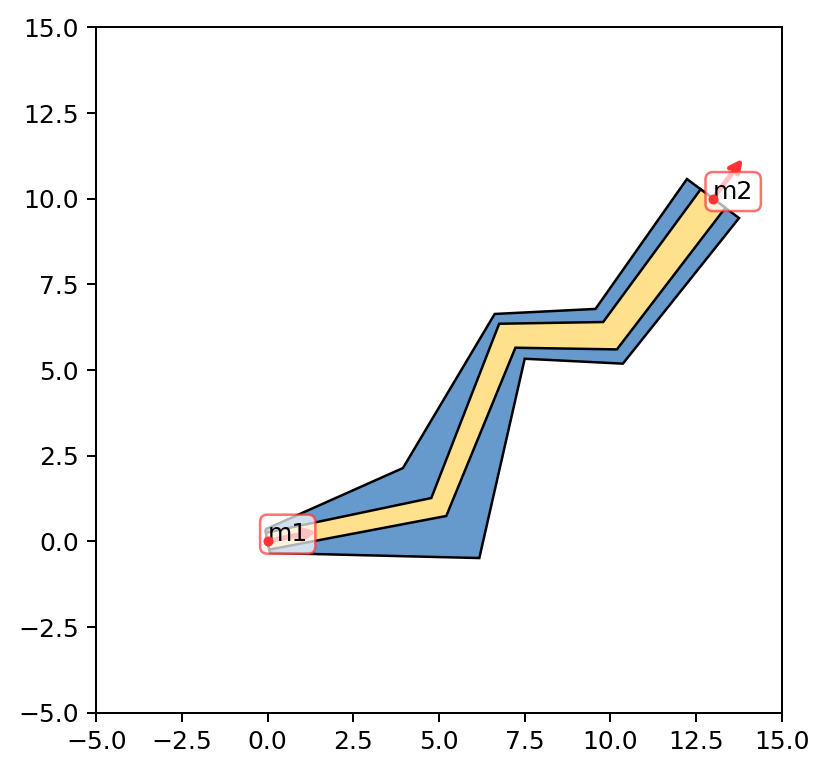

In [10]:
fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
set_limits(ax=ax, coor=[5,5], dxdy=[20,20])
EL.plot(ax=ax, layer=["l2", "l1", "anchorsmod"], color=colorlist, draw_direction=True)
plt.gca().set_aspect('equal')
plt.show()

In [11]:
ltp = {"top": (2,0.6), "gnd": (2 + 1,0.6 + 2*0.4)}
TP = Taper(5, ltp, ("m1", "m2"))

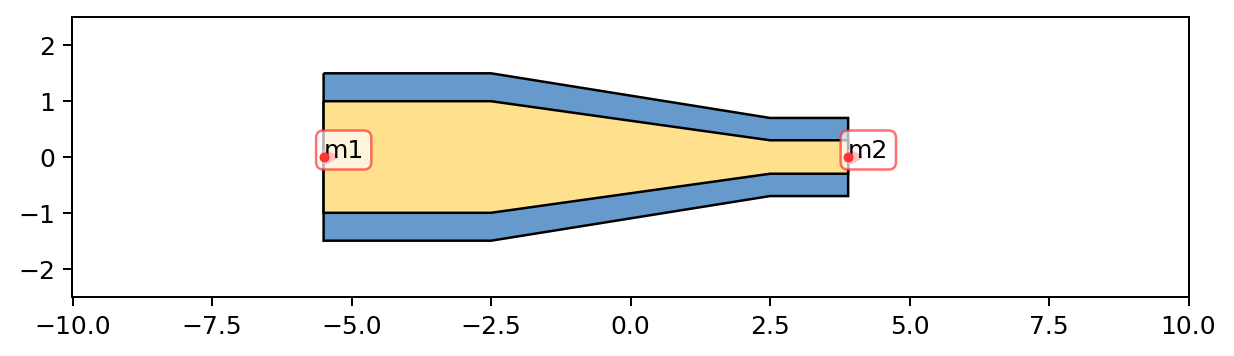

In [12]:
fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
set_limits(ax=ax, coor=[0,0], dxdy=[20,5])
TP.plot(ax=ax, layer=["gnd", "top", "anchorsmod"], color=colorlist, draw_direction=True)
plt.gca().set_aspect('equal')
plt.show()

In [13]:
pgate = Structure()
pgate.append(pgate_base)
pgate.append(TP, anchoring=("a1","m2"), direction_snap=True)
print(type(pgate.anchorsmod.multipoint))
pgate.remove_anchor(["m2","a1","b2"])
print(type(pgate.anchorsmod.multipoint))

<class 'list'>
<class 'list'>


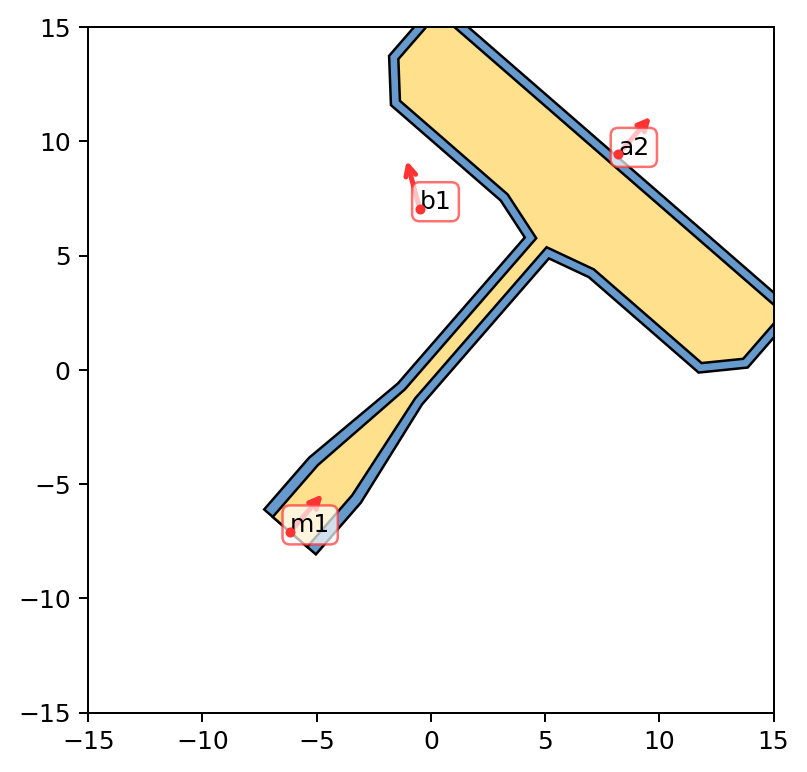

In [14]:
fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
set_limits(ax=ax, coor=[0,0], dxdy=[30,30])
pgate.plot(ax=ax, layer=["gnd", "top", "anchorsmod"], color=colorlist, draw_direction=True)
plt.gca().set_aspect('equal')
plt.show()

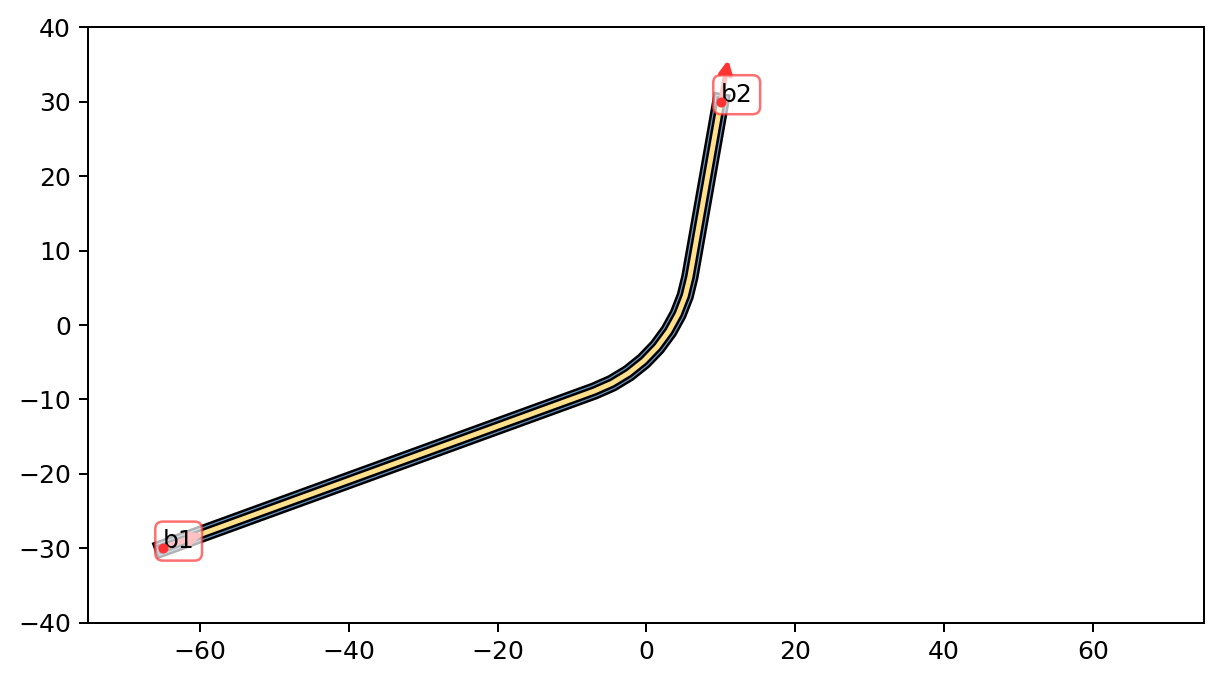

In [15]:
layer_info = {"metal": 1,
              "etch": 2}

p1 = Anchor((-65, -30), 20)
p2 = Anchor((10, 30), 80)

route = ElbowLine(p1, p2, radius=20, num_segments=9, layers=layer_info, alabel=("b1", "b2"))

fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
set_limits(ax=ax, coor=[0,0], dxdy=[150,80])
route.plot(ax=ax, layer=["etch", "metal", "anchorsmod"], color=colorlist)
plt.gca().set_aspect('equal')
plt.show()

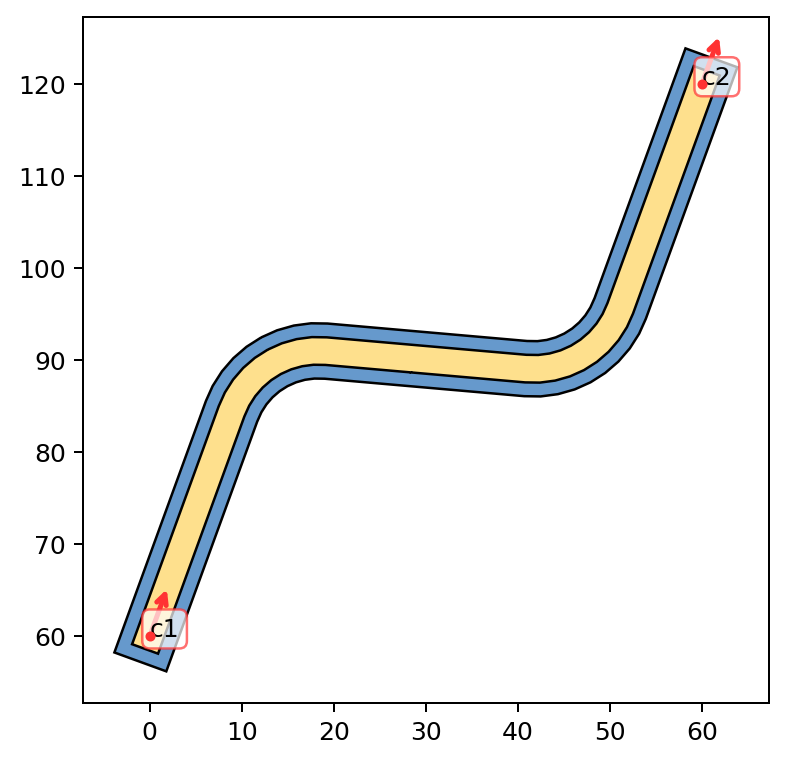

In [16]:
layer_info = {"top": 3,
              "gnd": 6}

p1 = Anchor(Point(0,0), 70)
p2 = Anchor(Point(60,60), 70)
r2 = SigmoidLine(p1, p2, -5, radius=10, num_segments=10, layers=layer_info, alabel=("c1", "c2"))
r2.moveby(xy=(0, 60))

fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
r2.plot(ax=ax, layer=["gnd", "top", "anchorsmod"], color=colorlist)
plt.gca().set_aspect('equal')
plt.show()

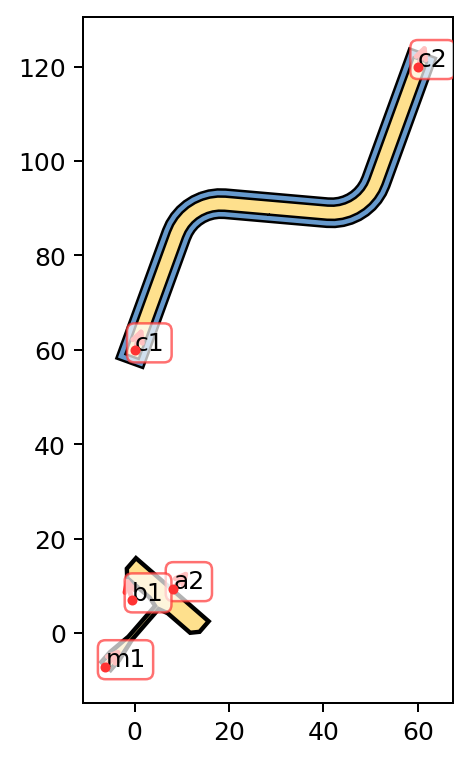

In [17]:
pgate.append(r2)
fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
#set_limits(ax=ax, coor=[0,0], dxdy=[30,30])
pgate.plot(ax=ax, layer=["gnd", "top", "anchorsmod"], color=colorlist, draw_direction=True)
plt.gca().set_aspect('equal')
plt.show()

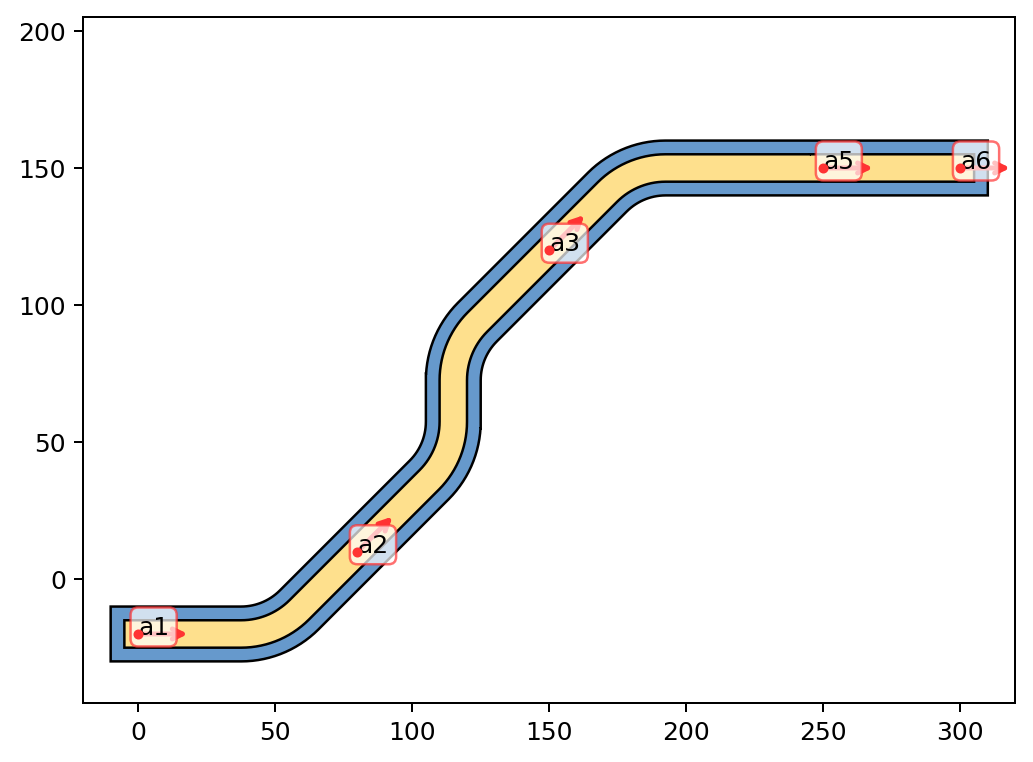

In [18]:
route_config = {"radius": 30, "num_segments": 16}

ss = SuperStructure(route_config)
ss.add_anchor([Anchor((0,-20), 0, "a1"),
               Anchor((80,10), 45, "a2"),
               Anchor((150,120), 45, "a3"),
               Anchor((250,150), 0, "a5"),
               Anchor((300,150), 00, "a6")])

ss.route(("a1", "a2", "a3"), layers={"top": 10, "gnd": 20})
ss.route(("a3", "a5", "a6"), layers={"top": 10, "gnd": 20})

fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
set_limits(ax=ax, coor=[150,80], dxdy=[340,250])
ss.plot(ax=ax, layer=["gnd", "top", "anchorsmod"], color=colorlist, draw_direction=True)
plt.gca().set_aspect('equal')
plt.show()

In [19]:
route_config = {"radius": 20,
                "num_segments": 21}

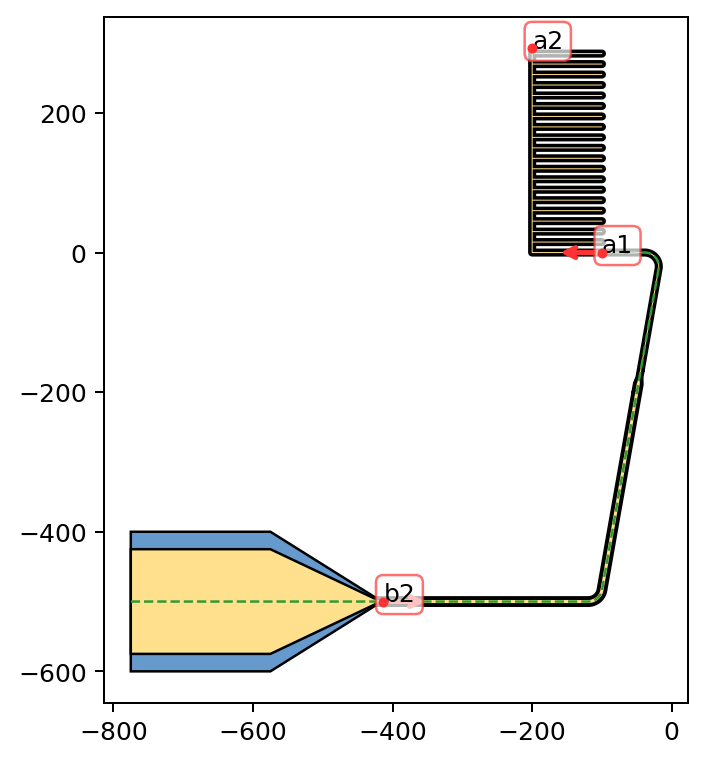

In [20]:
uch = uChannelsAngle(length=100,
                    spacing=15,
                    num=20,
                    angle=0,
                    layers={"bottom": 5, "top": 8},
                    alabel=("a1","a2"))


ss = SuperStructure(route_config)
ss.append(uch)

ss.rotate(90)
ss.moveby((-100, 0))

bonding_pad = Taper(length=150,
                    layers={"bottom": (150, 8), "top": (200, 12)},
                    alabel=("b1", "b2"))
bonding_pad.moveby((-500, -500))

ss.append(bonding_pad)
ss.add_anchor(Anchor((-50, -200), 80, "c1"))

tp = Taper(length=10,
            layers={"bottom": (8, 5), "top": (12, 8)},
            alabel=("t1", "t2"))
ss.append(tp, anchoring=["c1","t1"], direction_snap=True)


ss.route(anchors=("b2","t1"), layers={"bottom": 8, "top": 12})
ss.route(anchors=("t2","a1"), layers={"bottom": 5, "top": 8})

ss.fix_line()

ss.remove_anchor(["b1", "t1", "t2", "c1"])
#ss.mirror()
""""""
fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
#set_limits(ax=ax, coor=[-50,-200], dxdy=[40,90])
ss.plot(ax=ax, layer=["top", "bottom", "anchorsmod", "skeletone"], color=colorlist, draw_direction=True)
plt.gca().set_aspect('equal')
plt.show()

In [71]:
ss.export_to_gds(devname="test", filename="test", export_layers=["top", "bottom"])

In [35]:
from shapely import line_locate_point, line_interpolate_point

In [43]:
line1 = LineString([(0, 2), (0, 10)])
line2 = LineString([(0, 15), (7, 20)])
line = linemerge([line1, line2])
print(line)
point = Point(0, 4)
lc = line_locate_point(line, point, normalized=True)
print(lc)

pts = line_interpolate_point(line, np.linspace(0, 1, num=10), normalized=True).tolist()
print(pts)

MULTILINESTRING ((0 2, 0 10), (0 15, 7 20))
0.12046505340852535
[<POINT (0 2)>, <POINT (0 3.845)>, <POINT (0 5.689)>, <POINT (0 7.534)>, <POINT (0 9.379)>, <POINT (0.996 15.711)>, <POINT (2.497 16.783)>, <POINT (3.998 17.856)>, <POINT (5.499 18.928)>, <POINT (7 20)>]


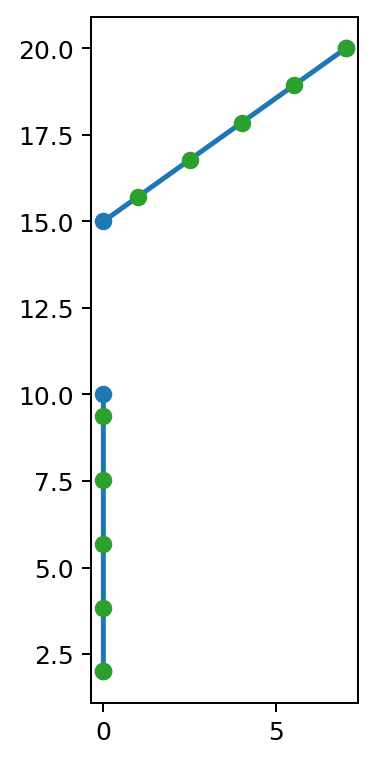

In [44]:

fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
plot_line(line, ax=ax)
plot_points(MultiPoint(pts), ax=ax, color="C2")
plt.gca().set_aspect('equal')
plt.show()

In [47]:
tt = np.linspace(0, 1, num=10)
print(tt[1:-1])

[0.11111111 0.22222222 0.33333333 0.44444444 0.55555556 0.66666667
 0.77777778 0.88888889]
